In [1]:
import geopandas as gp
import pandas as pd

In [2]:
path = gp.datasets.get_path('nybb')

In [3]:
gdf=gp.read_file(path)

In [4]:
gdf

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,330470.010332,1.623820e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227...."
1,4,Queens,896344.047763,3.045213e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957..."
2,3,Brooklyn,741080.523166,1.937479e+09,"MULTIPOLYGON (((1021176.479 151374.797, 102100..."
3,1,Manhattan,359299.096471,6.364715e+08,"MULTIPOLYGON (((981219.056 188655.316, 980940...."
4,2,Bronx,464392.991824,1.186925e+09,"MULTIPOLYGON (((1012821.806 229228.265, 101278..."


In [5]:
gdf.crs

{'init': 'epsg:2263'}

<AxesSubplot:>

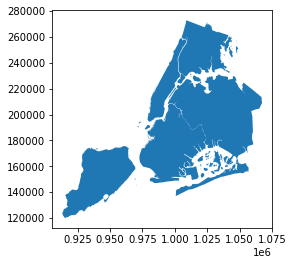

In [6]:
gdf.plot()

In [7]:
gdf['area']=gdf.area
gdf

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry,area
0,5,Staten Island,330470.010332,1.623820e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227....",1.623822e+09
1,4,Queens,896344.047763,3.045213e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957...",3.045214e+09
2,3,Brooklyn,741080.523166,1.937479e+09,"MULTIPOLYGON (((1021176.479 151374.797, 102100...",1.937478e+09
3,1,Manhattan,359299.096471,6.364715e+08,"MULTIPOLYGON (((981219.056 188655.316, 980940....",6.364712e+08
4,2,Bronx,464392.991824,1.186925e+09,"MULTIPOLYGON (((1012821.806 229228.265, 101278...",1.186926e+09


In [8]:
gdf['centroid']=gdf.centroid
gdf

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry,area,centroid
0,5,Staten Island,330470.010332,1.623820e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227....",1.623822e+09,POINT (941639.450 150931.991)
1,4,Queens,896344.047763,3.045213e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957...",3.045214e+09,POINT (1034578.078 197116.604)
2,3,Brooklyn,741080.523166,1.937479e+09,"MULTIPOLYGON (((1021176.479 151374.797, 102100...",1.937478e+09,POINT (998769.115 174169.761)
3,1,Manhattan,359299.096471,6.364715e+08,"MULTIPOLYGON (((981219.056 188655.316, 980940....",6.364712e+08,POINT (993336.965 222451.437)
4,2,Bronx,464392.991824,1.186925e+09,"MULTIPOLYGON (((1012821.806 229228.265, 101278...",1.186926e+09,POINT (1021174.790 249937.980)


In [9]:
firstpoint=gdf['centroid'].iloc[0]
gdf['distance']=gdf['centroid'].distance(firstpoint)
gdf['distancemiles']=gdf['distance']/5280

AttributeError: 'Series' object has no attribute 'distance'

In [ ]:
gdf

In [10]:
path=gp.datasets.get_path('naturalearth_lowres')

In [11]:
gdf2=gp.read_file(path)
gdf2

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


<AxesSubplot:>

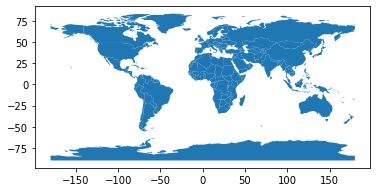

In [12]:
gdf2.plot()

In [13]:
cities=pd.DataFrame({'City':['Paris','Tokyo','Buenos Aires','Los Angeles'],
                    'Long':[2.352,139.650,-58.381,-118.241], 'Lat':[48.856,35.676,-34.605,34.057]})

In [14]:
citygdf=gp.GeoDataFrame(cities, geometry=gp.points_from_xy(cities['Lon'],cities['Lat']))

KeyError: 'Lon'